# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [61]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [62]:
# 匯入資料集
train, test = keras.datasets.cifar10.load_data()

# 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

x_train, y_train = train
x_test, y_test = test

# Preprocessing the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprocessing the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [63]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [64]:
# 超參數設定
from keras.optimizers import SGD,RMSprop,Adagrad,Adam
LEARNING_RATE = [1e-1, 1e-3]
OPTIMIZER = [SGD,RMSprop,Adagrad,Adam]
EPOCHS = 50
BATCH_SIZE = 256

In [65]:
# 使用迴圈，建立不同 optimizer, learning rate 的模型並訓練
results = {}

for opt in OPTIMIZER:
    for lr in LEARNING_RATE:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print()
        print("Experiment with Optimizer = %s" % str(opt),'learning rate =  %.3f' % (lr))
        print()
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        #opts = 'keras.optimizers.{}'.format(opt)(lr=lr, nesterov=True, momentum=MOMENTUM)
        #optimizer = opts
        #ERROR:'str' object is not callable
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt(lr=lr))

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]

        exp_name_tag = "optimizer = %s" % str(opt)+'lr = %s' %str(lr)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}



Experiment with Optimizer = <class 'keras.optimizers.SGD'> learning rate =  0.100

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validat

50000/50000 [==============================] - 10s 205us/step - loss: 0.7810 - accuracy: 0.7232 - val_loss: 1.7520 - val_accuracy: 0.4630
Epoch 49/50
50000/50000 [==============================] - 10s 205us/step - loss: 0.7610 - accuracy: 0.7291 - val_loss: 1.7729 - val_accuracy: 0.4954
Epoch 50/50
50000/50000 [==============================] - 10s 206us/step - loss: 0.7333 - accuracy: 0.7406 - val_loss: 1.6505 - val_accuracy: 0.5076

Experiment with Optimizer = <class 'keras.optimizers.SGD'> learning rate =  0.001

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    

50000/50000 [==============================] - 10s 202us/step - loss: 1.7156 - accuracy: 0.4021 - val_loss: 1.7246 - val_accuracy: 0.3979
Epoch 46/50
50000/50000 [==============================] - 10s 208us/step - loss: 1.7121 - accuracy: 0.4049 - val_loss: 1.7204 - val_accuracy: 0.4033
Epoch 47/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.7084 - accuracy: 0.4053 - val_loss: 1.7155 - val_accuracy: 0.4019
Epoch 48/50
50000/50000 [==============================] - 10s 203us/step - loss: 1.7050 - accuracy: 0.4071 - val_loss: 1.7135 - val_accuracy: 0.4012
Epoch 49/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.7015 - accuracy: 0.4067 - val_loss: 1.7087 - val_accuracy: 0.4082
Epoch 50/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.6979 - accuracy: 0.4093 - val_loss: 1.7058 - val_accuracy: 0.4057

Experiment with Optimizer = <class 'keras.optimizers.RMSprop'> learning rate =  0.100

Model: "model_1"
_______

50000/50000 [==============================] - 12s 238us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 42/50
50000/50000 [==============================] - 12s 237us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 43/50
50000/50000 [==============================] - 12s 235us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 44/50
50000/50000 [==============================] - 12s 235us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 45/50
50000/50000 [==============================] - 12s 234us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 46/50
50000/50000 [==============================] - 12s 234us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 47/50
50000/50000 [==============================] - 12s 233us/step - loss: 14.5063 - accuracy

50000/50000 [==============================] - 12s 245us/step - loss: 0.9184 - accuracy: 0.6716 - val_loss: 1.7665 - val_accuracy: 0.4551
Epoch 38/50
50000/50000 [==============================] - 12s 235us/step - loss: 0.9022 - accuracy: 0.6756 - val_loss: 1.8236 - val_accuracy: 0.4869
Epoch 39/50
50000/50000 [==============================] - 12s 238us/step - loss: 0.8936 - accuracy: 0.6800 - val_loss: 2.0274 - val_accuracy: 0.4314
Epoch 40/50
50000/50000 [==============================] - 12s 236us/step - loss: 0.8772 - accuracy: 0.6847 - val_loss: 1.8879 - val_accuracy: 0.4661
Epoch 41/50
50000/50000 [==============================] - 12s 237us/step - loss: 0.8652 - accuracy: 0.6909 - val_loss: 1.7171 - val_accuracy: 0.5005
Epoch 42/50
50000/50000 [==============================] - 12s 236us/step - loss: 0.8510 - accuracy: 0.6944 - val_loss: 1.8636 - val_accuracy: 0.4839
Epoch 43/50
50000/50000 [==============================] - 12s 236us/step - loss: 0.8338 - accuracy: 0.7012 - va

50000/50000 [==============================] - 11s 225us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 34/50
50000/50000 [==============================] - 11s 224us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 35/50
50000/50000 [==============================] - 13s 251us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 36/50
50000/50000 [==============================] - 12s 237us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 37/50
50000/50000 [==============================] - 12s 233us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 38/50
50000/50000 [==============================] - 12s 233us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 39/50
50000/50000 [==============================] - 12s 232us/step - loss: 14.5063 - accuracy

Epoch 30/50
50000/50000 [==============================] - 12s 231us/step - loss: 1.3472 - accuracy: 0.5331 - val_loss: 1.4293 - val_accuracy: 0.4902
Epoch 31/50
50000/50000 [==============================] - 13s 266us/step - loss: 1.3422 - accuracy: 0.5333 - val_loss: 1.4446 - val_accuracy: 0.4872
Epoch 32/50
50000/50000 [==============================] - 12s 233us/step - loss: 1.3337 - accuracy: 0.5368 - val_loss: 1.4183 - val_accuracy: 0.5025
Epoch 33/50
50000/50000 [==============================] - 12s 231us/step - loss: 1.3297 - accuracy: 0.5374 - val_loss: 1.4086 - val_accuracy: 0.5021
Epoch 34/50
50000/50000 [==============================] - 12s 231us/step - loss: 1.3231 - accuracy: 0.5412 - val_loss: 1.4191 - val_accuracy: 0.4972
Epoch 35/50
50000/50000 [==============================] - 11s 230us/step - loss: 1.3178 - accuracy: 0.5442 - val_loss: 1.4043 - val_accuracy: 0.5051
Epoch 36/50
50000/50000 [==============================] - 12s 232us/step - loss: 1.3111 - accuracy:

50000/50000 [==============================] - 13s 262us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 27/50
50000/50000 [==============================] - 13s 261us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 28/50
50000/50000 [==============================] - 13s 261us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 29/50
50000/50000 [==============================] - 13s 263us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 30/50
50000/50000 [==============================] - 13s 262us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 31/50
50000/50000 [==============================] - 13s 262us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 32/50
50000/50000 [==============================] - 17s 334us/step - loss: 14.5063 - accuracy

Epoch 23/50
50000/50000 [==============================] - 13s 263us/step - loss: 1.0612 - accuracy: 0.6198 - val_loss: 1.3746 - val_accuracy: 0.5281
Epoch 24/50
50000/50000 [==============================] - 13s 263us/step - loss: 1.0394 - accuracy: 0.6262 - val_loss: 1.4056 - val_accuracy: 0.5149
Epoch 25/50
50000/50000 [==============================] - 13s 264us/step - loss: 1.0269 - accuracy: 0.6312 - val_loss: 1.3943 - val_accuracy: 0.5138
Epoch 26/50
50000/50000 [==============================] - 13s 267us/step - loss: 0.9968 - accuracy: 0.6458 - val_loss: 1.4497 - val_accuracy: 0.5087
Epoch 27/50
50000/50000 [==============================] - 14s 270us/step - loss: 0.9843 - accuracy: 0.6469 - val_loss: 1.4793 - val_accuracy: 0.5006
Epoch 28/50
50000/50000 [==============================] - 13s 269us/step - loss: 0.9650 - accuracy: 0.6554 - val_loss: 1.3939 - val_accuracy: 0.5284
Epoch 29/50
50000/50000 [==============================] - 13s 269us/step - loss: 0.9493 - accuracy:

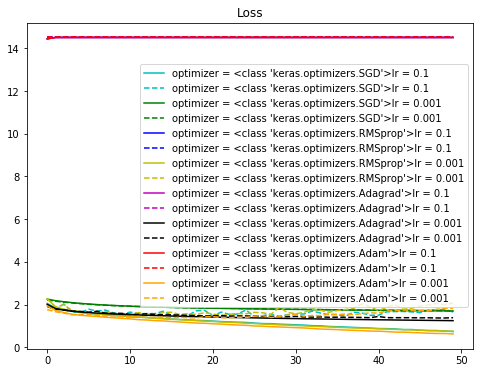

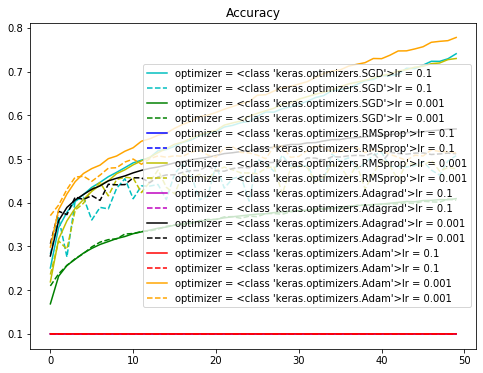

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["c", "g", "b", "y", "m", "k",'r','orange']

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()